# Linear Regression - House Price Prediction

## Import Required Packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


## Load data

In [3]:
train_path = "data/train.csv"
test_path = "data/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Select Required Columns

In [4]:
cols = ["GrLivArea", "BedroomAbvGr", "SalePrice"]
train_clean = train_df[cols].dropna()


### Test dataset contains no salesPrice

In [5]:
test_clean = test_df[["GrLivArea", "BedroomAbvGr"]].dropna()


## Create Train/Test Split from the training data

In [9]:
X = train_clean[["GrLivArea", "BedroomAbvGr"]]
y = train_clean["SalePrice"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Train Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   122.69545313 -25801.06101978]
Intercept: 68611.98727977721


## Validate Model (Evaluate)

### Only evaluate on validation data (not the external test.csv)

In [11]:
y_pred = model.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE:", np.sqrt(mse))


MSE: 2951505444.073081
R2 Score: 0.6152047039006622
RMSE: 54327.759424377895


## Train Final Model on Full Training Data

In [12]:
final_model = LinearRegression()
final_model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predict on Real Test Dataset (without SalePrice)

In [13]:
test_predictions = final_model.predict(test_clean)

test_predictions[:10]


array([124380.10929865, 153293.46504776, 191963.10387672, 188740.63397431,
       173877.24699972, 195314.47257523, 134989.83600205, 170823.70131689,
       181740.07356161, 122575.5261533 ])

### save the output

In [14]:
output = pd.DataFrame({
    "Id": test_df["Id"], 
    "PredictedSalePrice": test_predictions
})

output.to_csv("predictions.csv", index=False)
output.head()


,Id,PredictedSalePrice
0,1461,124380.109299
1,1462,153293.465048
2,1463,191963.103877
3,1464,188740.633974
4,1465,173877.247000


## Visualization (Regression Line)

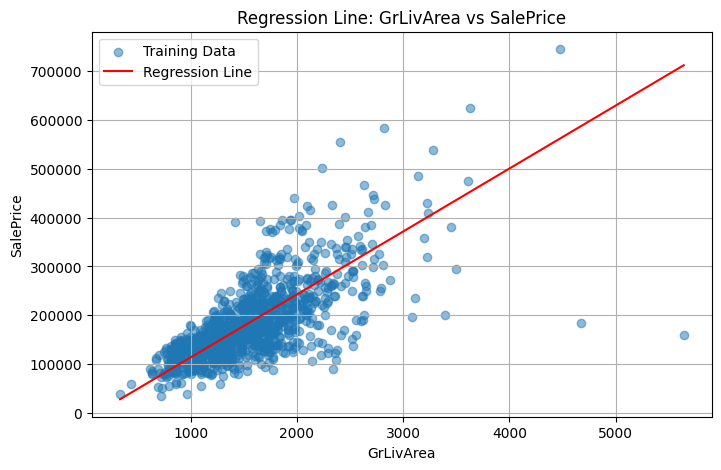

In [15]:
plt.figure(figsize=(8,5))

plt.scatter(X_train["GrLivArea"], y_train, alpha=0.5, label="Training Data")

area_range = np.linspace(X_train["GrLivArea"].min(), X_train["GrLivArea"].max(), 200)
mean_bedrooms = X_train["BedroomAbvGr"].mean()

X_line = pd.DataFrame({
    "GrLivArea": area_range,
    "BedroomAbvGr": mean_bedrooms,
})

y_line = final_model.predict(X_line)

plt.plot(area_range, y_line, color="red", label="Regression Line")

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Regression Line: GrLivArea vs SalePrice")
plt.legend()
plt.grid(True)
plt.show()


## SalesPrice with Number of Bedroom

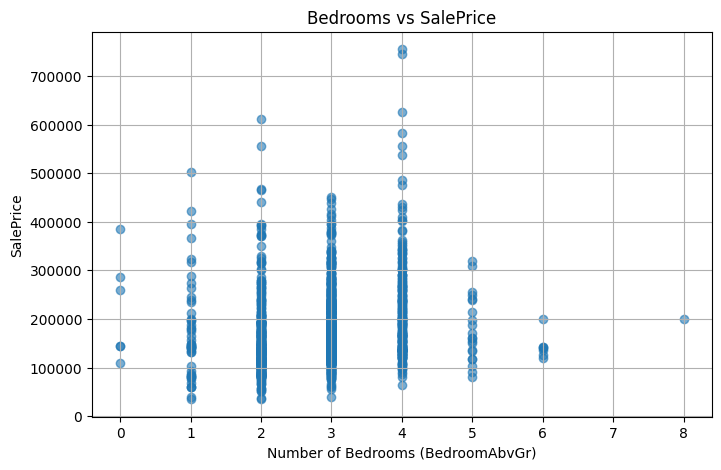

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(train_clean["BedroomAbvGr"], train_clean["SalePrice"], alpha=0.6)
plt.xlabel("Number of Bedrooms (BedroomAbvGr)")
plt.ylabel("SalePrice")
plt.title("Bedrooms vs SalePrice")
plt.grid(True)
plt.show()


## Scatter Plot: GrLivArea vs SalePrice (Colored by Bedrooms)


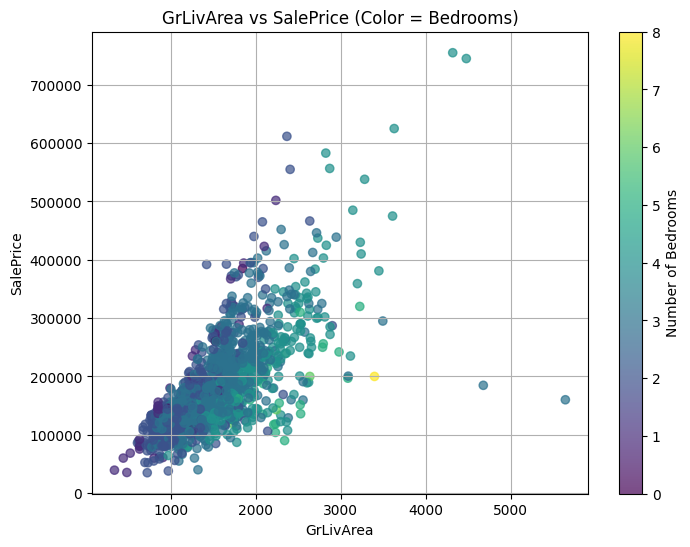

In [17]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    train_clean["GrLivArea"], 
    train_clean["SalePrice"], 
    c=train_clean["BedroomAbvGr"], 
    cmap="viridis",
    alpha=0.7
)

plt.colorbar(scatter, label="Number of Bedrooms")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("GrLivArea vs SalePrice (Color = Bedrooms)")
plt.grid(True)
plt.show()


## 3D Scatter Plot (GrLivArea, Bedrooms, SalePrice)

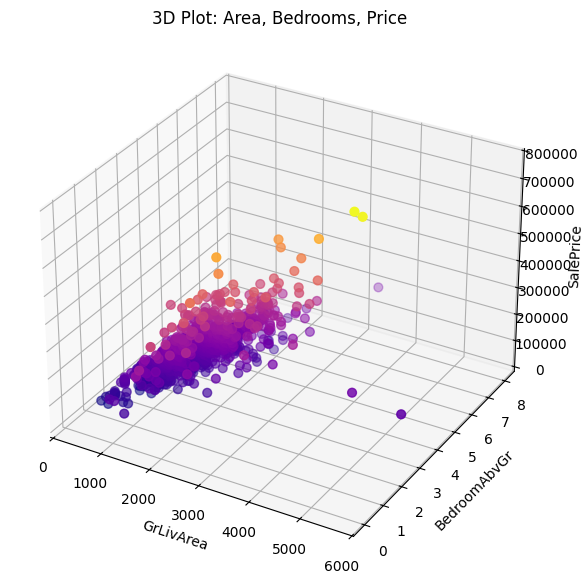

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

x = train_clean["GrLivArea"]
y = train_clean["BedroomAbvGr"]
z = train_clean["SalePrice"]

ax.scatter(x, y, z, c=z, cmap="plasma", s=40)

ax.set_xlabel("GrLivArea")
ax.set_ylabel("BedroomAbvGr")
ax.set_zlabel("SalePrice")
ax.set_title("3D Plot: Area, Bedrooms, Price")

plt.show()


## Actual - Predicted

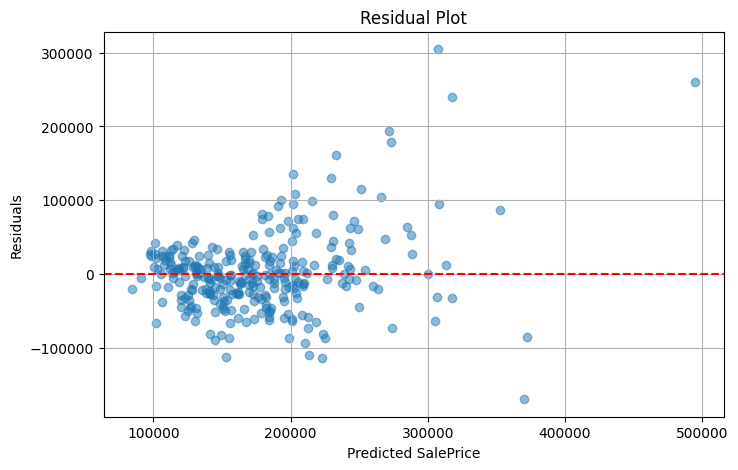

In [19]:
residuals = y_valid - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


## Histogram of SalePrice

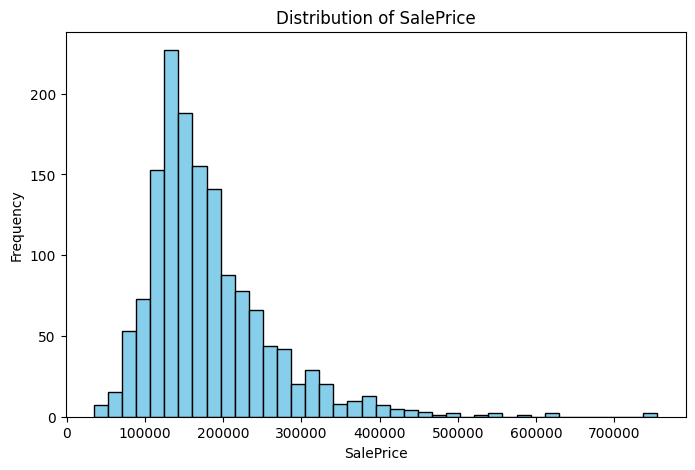

In [20]:
plt.figure(figsize=(8,5))
plt.hist(train_clean["SalePrice"], bins=40, color="skyblue", edgecolor="black")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrice")
plt.grid(False)
plt.show()
